In [42]:
import pandas as pd
from random import random

from pam.core import Household, Person  # pam is a dependancy
from spam import State  # run this notebook on spam root
from graph import subjects, state_of_mind, GraphTraverser

In [44]:
outpath = "AK_plan.png"
initial_subject = "something wrong\nwith the world"
initial_state_of_mind = "carefully explain"
rant_chance = 0.1

In [45]:
def cmap_builder(states):
    cmap = {"Travel": (0.,0.,0.)}
    chi = {
        'carefully': (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
        'dryly': (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
        'exclaim': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
        'fondly': (0.4, 0.7607843137254902, 0.6470588235294118),
        'get': (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
        'pivot': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
        'reminisce': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)
        }
    for state in states:
        cmap[state.title()] = chi.get(state.split(" ")[0], (0.6, 0.6, 0.6))
    return cmap
    

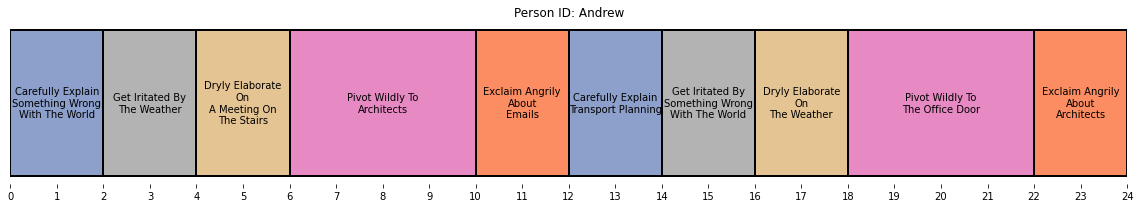

In [50]:
andrew = Person("Andrew")

state_machine = State(andrew)
conversation = GraphTraverser(graph=subjects, state=initial_subject)
mind = GraphTraverser(graph=state_of_mind, state=initial_state_of_mind)
state_machine.seed_state(mind.state + "\n" + conversation.state)

step = 120
for time in range(step, 24*60, step):
    if rant_chance > random():
        continue 
    state_machine.update(time, mind.traverse() + "\n" + conversation.traverse())

state_machine.close()

andrew.plot(
    legend=False,
    cmap=cmap_builder(andrew.activity_classes),
    path=outpath
)
